In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

# Using textblob to generate sentiment for easy visualization
from textblob import TextBlob

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Web_and_social_media_analytics /final.csv')

<ipython-input-3-250cd1c7fecd>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/gdrive/MyDrive/Web_and_social_media_analytics /final.csv')


In [ ]:
df_pos_words=pd.read_csv("/content/gdrive/MyDrive/Web_and_social_media_analytics /pos_sentiment_word.csv")
df_neg_words=pd.read_csv("/content/gdrive/MyDrive/Web_and_social_media_analytics /neg_sentiment_word.csv")

In [ ]:
# counting positive and negative instances
pos_neg = df.review_sentiment.value_counts()
pos_neg

POSITIVE    32741
NEGATIVE    11659
Name: review_sentiment, dtype: int64

In [ ]:
# mapping labels to 0 and 1
df['review_sentiment'] = df.review_sentiment.map({'POSITIVE':1, 'NEGATIVE':0})

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,overall,verified,reviewerID,asin,style,reviewerName,unixReviewTime,vote,...,feature,also_view,details,price,category1,new_rank,review_text,review_sentiment1,rating_class,review_text_nostop
0,0,0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Old-and-Wise,1095724800,2.0,...,[],[],{},0.0,Cell Phones,3059436.0,Bad reception This phone is ugly and heavy and...,Negative,bad,bad reception phone ugly heavy terrible user i...
1,1,1,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Sherry Berry,1090627200,15.0,...,[],[],{},0.0,Cell Phones,3059436.0,Pretty good phone.. an improvement from my v20...,Positive,good,pretty good phone improvement v205 samsung v20...
2,2,2,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Benjamin David,1089072000,11.0,...,[],[],{},0.0,Cell Phones,3059436.0,Not as user friendly as the Motorola V300- Thi...,Positive,good,not user friendly motorola v300 samsung phone ...
3,3,3,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,{'Package Type:': ' Standard Packaging'},James Beswick,1081728000,4.0,...,[],[],{},0.0,Cell Phones,3059436.0,The best phone I've ever owned ..and I'm from ...,Positive,good,best phone own europe phone network better sam...
4,4,4,3.0,False,A3NOBH42C7UI5M,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Kepela,1077148800,12.0,...,[],[],{},0.0,Cell Phones,3059436.0,I love the phone but it has some real problems...,Positive,good,love phone real problems phone amazingly light...


In [ ]:
df['review_text_nostop'][0]

'bad reception phone ugly heavy terrible user interface techies like drop call like crazy manhattan moto v600 better phone take better picture better clarity reception cheaper moto v600 tmobile stay ugly monster'

In [ ]:
# calculating sentiment polarity using external libraries
df['sentiment'] = df['review_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df.head(3)

,Unnamed: 0.1,Unnamed: 0,overall,verified,reviewerID,asin,style,reviewerName,unixReviewTime,vote,...,also_view,details,price,category1,new_rank,review_text,review_sentiment1,rating_class,review_text_nostop,sentiment
0,0,0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Old-and-Wise,1095724800,2.0,...,[],{},0.0,Cell Phones,3059436.0,Bad reception This phone is ugly and heavy and...,Negative,bad,bad reception phone ugly heavy terrible user i...,-0.200000
1,1,1,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Sherry Berry,1090627200,15.0,...,[],{},0.0,Cell Phones,3059436.0,Pretty good phone.. an improvement from my v20...,Positive,good,pretty good phone improvement v205 samsung v20...,0.214537
2,2,2,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Benjamin David,1089072000,11.0,...,[],{},0.0,Cell Phones,3059436.0,Not as user friendly as the Motorola V300- Thi...,Positive,good,not user friendly motorola v300 samsung phone ...,0.099918


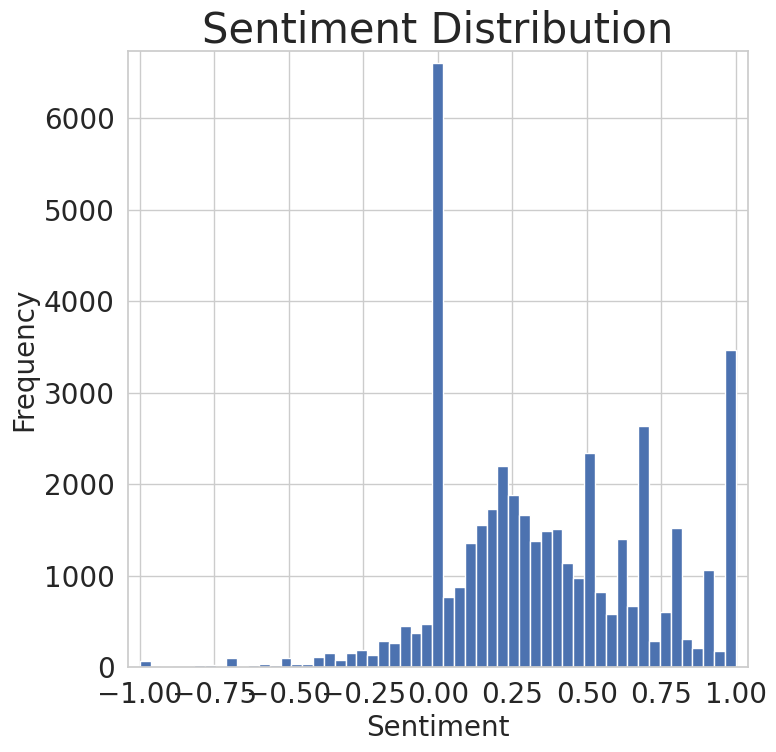

In [ ]:
#Barchart using to visualize the sentiment distribution generated above
plt.figure(figsize=(8,8))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=20)
plt.hist(df['sentiment'], bins=55)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()

<ipython-input-11-0048e32eaa6f>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


<Axes: >

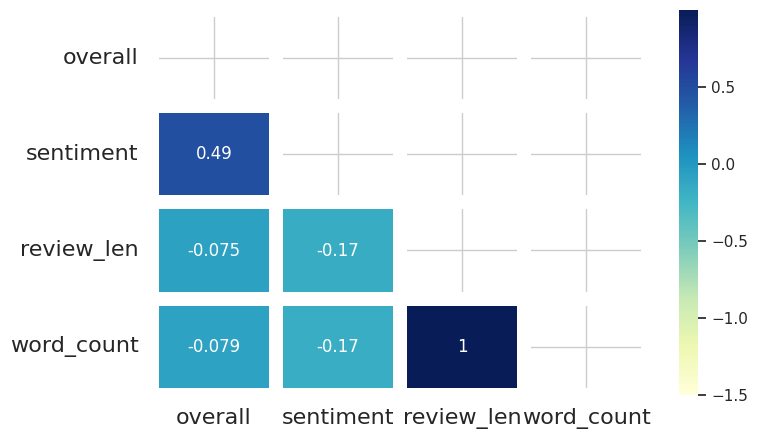

In [ ]:
# Heatmap from overall rating, review length, sentiment and word count

# calculating word count and review length
df['word_count'] = df["review_text"].apply(lambda x: len(str(x).split(" ")))
df['review_len'] =df["review_text"].apply(lambda x: len(str(x)))

# visualising the heatmap
correlation = df[['overall','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(correlation, cmap='YlGnBu', annot=True, annot_kws={"size": 12}, linewidths=10, vmin=-1.5, mask=mask)

In [ ]:
# convert to X and y
X = df.review_text
y = df.review_sentiment
print(X.shape)
print(y.shape)

(44400,)
(44400,)


In [ ]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
X_train.head()

36747    It worked well for the life of it. It worked w...
14788                       Five Stars Excelente Producto!
6782     Very pleased More important for me is the life...
6154     I wish i had a iphone or android Let me start ...
23616    Research research I'm just letting you know do...
Name: review_text, dtype: object

In [ ]:
y_train.head()

36747    0
14788    0
6782     1
6154     1
23616    1
Name: review_sentiment, dtype: int64

In [ ]:
# vectorizing the sentences
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [ ]:
vect.fit(X_train)

CountVectorizer()

In [ ]:
vect.vocabulary_

{'it': 15229,
 'worked': 30095,
 'well': 29680,
 'for': 11779,
 'the': 27024,
 'life': 16246,
 'of': 19029,
 'just': 15515,
 'not': 18748,
 'enough': 10224,
 'memory': 17277,
 'and': 3057,
 'pain': 19741,
 'to': 27399,
 'transfer': 27686,
 'data': 8150,
 'sd': 23948,
 'card': 5922,
 'five': 11513,
 'stars': 25665,
 'excelente': 10644,
 'producto': 21286,
 'very': 29076,
 'pleased': 20606,
 'more': 17868,
 'important': 14368,
 'me': 17150,
 'is': 15182,
 'battery': 4455,
 'used': 28776,
 'this': 27139,
 'phone': 20302,
 'in': 14417,
 'normal': 18730,
 'environment': 10296,
 'after': 2637,
 'cycles': 8003,
 'became': 4547,
 'full': 12092,
 'shape': 24287,
 'now': 18828,
 'last': 15932,
 'hours': 13896,
 'on': 19164,
 'top': 27486,
 'superb': 26196,
 'works': 30109,
 'really': 22126,
 'one': 19170,
 'small': 24913,
 'negative': 18424,
 'point': 20706,
 'that': 27018,
 'comes': 6789,
 'as': 3510,
 'an': 3038,
 'at': 3627,
 'unit': 28438,
 'with': 29981,
 'pre': 20963,
 'loaded': 16452,
 'a

In [ ]:
# vocab size
len(vect.vocabulary_.keys())

30628

In [ ]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [ ]:
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 3057)	1
  (0, 5922)	1
  (0, 8150)	1
  (0, 10224)	1
  (0, 11779)	2
  (0, 15229)	4
  (0, 15515)	1
  (0, 16246)	2
  (0, 17277)	1
  (0, 18748)	1
  (0, 19029)	2
  (0, 19741)	1
  (0, 23948)	1
  (0, 27024)	3
  (0, 27399)	2
  (0, 27686)	1
  (0, 29680)	2
  (0, 30095)	2
  (1, 10644)	1
  (1, 11513)	1
  (1, 21286)	1
  (1, 25665)	1
  (2, 2637)	1
  (2, 3038)	1
  (2, 3057)	4
  :	:
  (33298, 12685)	1
  (33298, 14473)	1
  (33298, 15182)	2
  (33298, 15229)	2
  (33298, 15502)	1
  (33298, 15603)	1
  (33298, 16872)	1
  (33298, 18748)	1
  (33298, 19436)	1
  (33298, 20302)	2
  (33298, 21118)	1
  (33298, 22097)	1
  (33298, 24939)	1
  (33298, 25135)	1
  (33298, 26971)	1
  (33298, 27024)	3
  (33298, 27139)	1
  (33298, 27606)	1
  (33298, 29981)	1
  (33299, 4274)	1
  (33299, 4455)	1
  (33299, 8817)	1
  (33299, 17851)	1
  (33299, 27468)	1
  (33299, 29986)	1


In [ ]:
# function to plot confusion matrix
def plot_confusion_matrix(confusion_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]

    labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
    plt.title("Confusion matrix")
    plt.show()

In [ ]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

#Applying the model on train set too
y_pred_train = mnb.predict(X_train_transformed) # returns classes 0 and 1

y_pred_proba_tr = mnb.predict_proba(X_train_transformed) # returns the probability of a review being positive

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [ ]:
# printing  accuracy on train dataset
from sklearn import metrics
y_pred_train = mnb.predict(X_train_transformed)

print ("Accuracy on train dataset :")
metrics.accuracy_score( y_train, y_pred_train)

Accuracy on train dataset :


0.8891291291291291

In [ ]:
# printing the  accuracy on test dataset
from sklearn import metrics
print ("Accuracy on test dataset :")
metrics.accuracy_score(y_test, y_pred_class)

Accuracy on test dataset :


0.8723423423423423

In [ ]:
# confusion matrix
confusion_train =metrics.confusion_matrix(y_train, y_pred_train)
print(confusion_train)

[[ 6994  1741]
 [ 1951 22614]]


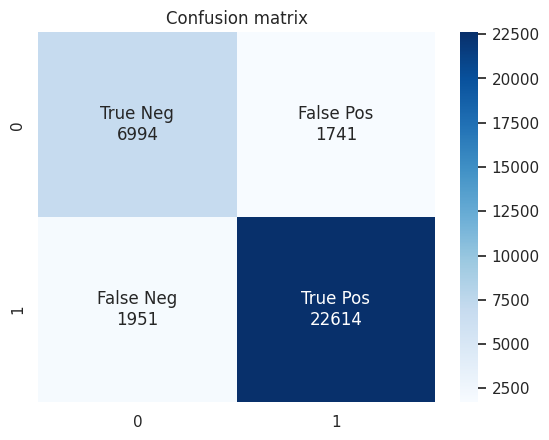

In [ ]:
# ploting confusion matrix
plot_confusion_matrix(confusion_train)

In [ ]:
# confusion matrix
confusion_test =metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_test)

[[2178  746]
 [ 671 7505]]


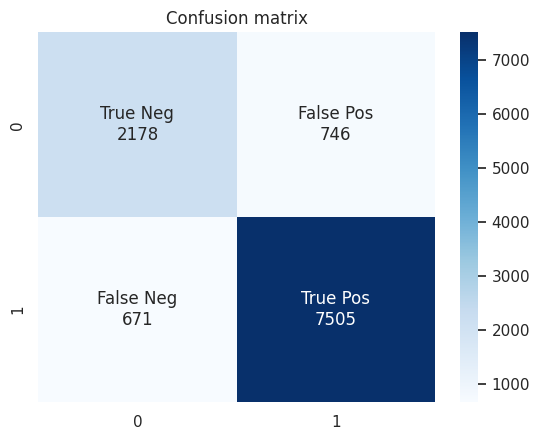

In [ ]:
# ploting confusion matrix
plot_confusion_matrix(confusion_test)

In [ ]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

In [ ]:
# for train dataset
false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, y_pred_proba_tr[:,1])
roc_auc_tr = auc(false_positive_rate_tr, true_positive_rate_tr)

In [ ]:
# for test dataset
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [ ]:
# area under the curve
print (roc_auc)

0.8648168390484579


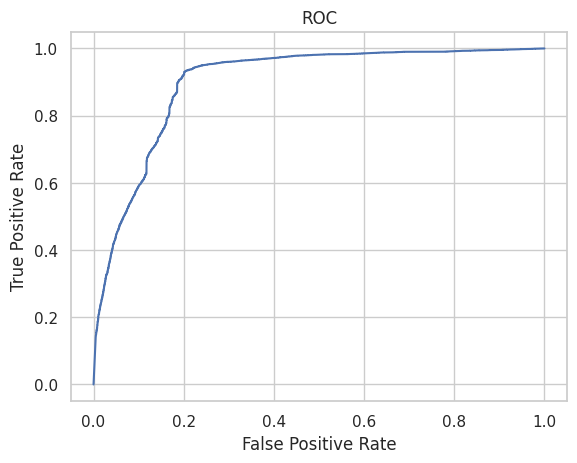

In [ ]:
# plotting the ROC curve for train set
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate_tr, true_positive_rate_tr)

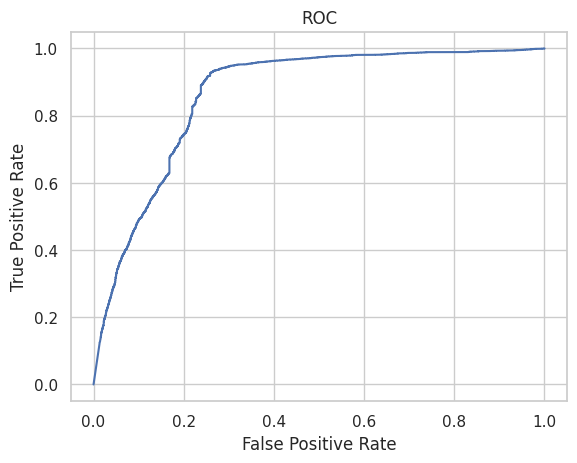

In [ ]:
# plotting the ROC curve for test set
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

calculate other Matrics - Sensitivity, Specificity, Precision,Recall and F1 score for train and test dataset

In [ ]:
# for train dataset
TN_train = confusion_train[0, 0]
FP_train = confusion_train[0, 1]
FN_train = confusion_train[1, 0]
TP_train = confusion_train[1, 1]

In [ ]:
# for test datset
TN_test = confusion_test[0, 0]
FP_test = confusion_test[0, 1]
FN_test = confusion_test[1, 0]
TP_test = confusion_test[1, 1]

In [ ]:
sensitivity_train = TP_train / float(FN_train + TP_train)
sensitivity_test = TP_test / float(FN_test + TP_test)
print("sensitivity on train dataset",sensitivity_train)
print("sensitivity on test dataset",sensitivity_test)

sensitivity on train dataset 0.9205780582129045
sensitivity on test dataset 0.9179305283757339


In [ ]:
specificity_train = TN_train / float(TN_train + FP_train)
specificity_test = TN_test / float(TN_test + FP_test)
print("specificity on train dataset",specificity_train)
print("specificity on train dataset",specificity_test)

specificity on train dataset 0.8006868918145392
specificity on train dataset 0.7448700410396717


In [ ]:
#Precision = TruePositives / (TruePositives + FalsePositive)
precision_train = TP_train / float(TP_train + FP_train)
precision_test = TP_test / float(TP_test + FP_test)
print("precision on train dataset",precision_train)
print("precision on test dataset",precision_test)

precision on train dataset 0.9285157051940054
precision on test dataset 0.9095867167616046


In [ ]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
Recall_train = TP_train / float(TP_train + FN_train)
Recall_test = TP_test / float(TP_test + FN_test)
print("Recall on train dataset",Recall_train)
print("Recall on test dataset",Recall_test)

Recall on train dataset 0.9205780582129045
Recall on test dataset 0.9179305283757339


In [ ]:
# F1 = 2*(P*R) / (P+R)
F1_train = 2*(precision_train*Recall_train) / (precision_train + Recall_train)
F1_test = 2*(precision_test*Recall_test) / (precision_test + Recall_test)
print("F1 on train dataset",F1_train)
print("F1 on test dataset",F1_test)

F1 on train dataset 0.9245298446443173
F1 on test dataset 0.9137395750897912


In [ ]:
from imblearn import over_sampling
ros = over_sampling.RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(pd.DataFrame(X_train), pd.Series(y_train))

In [ ]:
pd.Series(y_train).value_counts()

0    24565
1    24565
Name: review_sentiment, dtype: int64